In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting?select=train.csv
df = pd.read_csv('super_store_sales_data.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [112]:
#null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
order_year        0
dtype: int64

In [6]:
df['Order Date'].unique

<bound method Series.unique of 0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9800, dtype: object>

In [39]:
#yearly sales
df['order_year'] = pd.to_datetime(df['Order Date']).dt.year

In [40]:
df_yearly_sales = df.groupby('order_year').mean()

In [41]:
df_yearly_sales['Sales']

order_year
2015    245.702103
2016    223.569832
2017    236.855781
2018    221.624315
Name: Sales, dtype: float64

In [54]:
#ship mode + year wise sales 
df_ship_mode_sales = df.groupby(['Ship Mode','order_year']).mean()

In [55]:
df_ship_mode_sales.index

MultiIndex([(   'First Class', 2015),
            (   'First Class', 2016),
            (   'First Class', 2017),
            (   'First Class', 2018),
            (      'Same Day', 2015),
            (      'Same Day', 2016),
            (      'Same Day', 2017),
            (      'Same Day', 2018),
            (  'Second Class', 2015),
            (  'Second Class', 2016),
            (  'Second Class', 2017),
            (  'Second Class', 2018),
            ('Standard Class', 2015),
            ('Standard Class', 2016),
            ('Standard Class', 2017),
            ('Standard Class', 2018)],
           names=['Ship Mode', 'order_year'])

In [56]:
df_ship_mode_sales['Sales']

Ship Mode       order_year
First Class     2015          209.267108
                2016          240.993093
                2017          214.933020
                2018          245.793870
Same Day        2015          194.112600
                2016          255.565944
                2017          203.086737
                2018          263.403543
Second Class    2015          269.572866
                2016          215.175412
                2017          247.496114
                2018          222.639526
Standard Class  2015          250.664870
                2016          219.797907
                2017          242.467636
                2018          209.824149
Name: Sales, dtype: float64

In [57]:

df_ship_mode_sales.unstack(level=0)

Row ID                                           \
Ship Mode   First Class     Same Day Second Class Standard Class   
order_year                                                         
2015        5076.748227  5420.477778  4566.794118    4872.603977   
2016        4606.584559  4532.500000  5199.633005    4802.828211   
2017        4423.333333  4780.064103  4641.589583    5006.690178   
2018        4881.155477  5502.103261  4874.155763    5042.571275   

             Postal Code                                             \
Ship Mode    First Class      Same Day  Second Class Standard Class   
order_year                                                            
2015        54896.521277  55589.333333  57978.072193   56896.840928   
2016        50602.180147  53334.870370  53970.785185   53197.274448   
2017        54375.409449  54894.057692  54451.418750   54700.100463   
2018        57420.234982  62971.652174  56199.129283   55371.962386   

                 Sales                                          
Ship Mode  First Class    Same Day Second Class Standard Class  
order_year                                                      
2015        209.267108  194.112600   269.572866     250.664870  
2016        240.993093  255.565944   215.175412     219.797907  
2017        214.933020  203.086737   247.496114     242.467636  
2018        245.793870  263.403543   222.639526     209.824149

<AxesSubplot:ylabel='Ship Mode,order_year'>

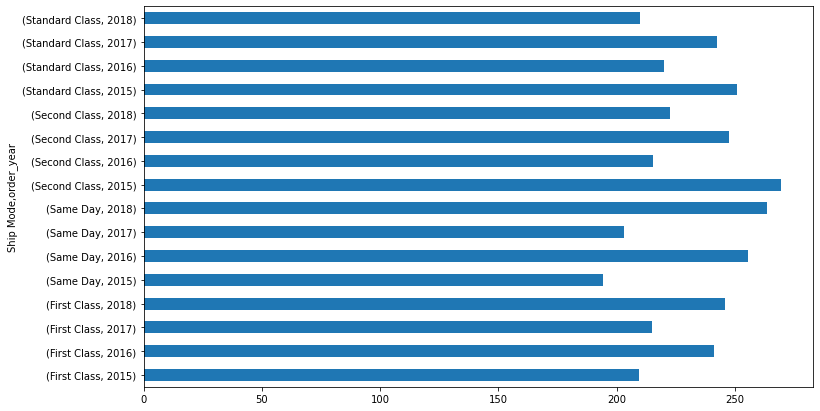

In [64]:
df_ship_mode_sales['Sales'].plot(kind='barh', figsize=(12,7), )

In [67]:
#type of costumer wise sales
df_segment = df.groupby('Segment').mean()

In [69]:
df_segment['Sales']

Segment
Consumer       225.065777
Corporate      233.150720
Home Office    243.403309
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Segment'>

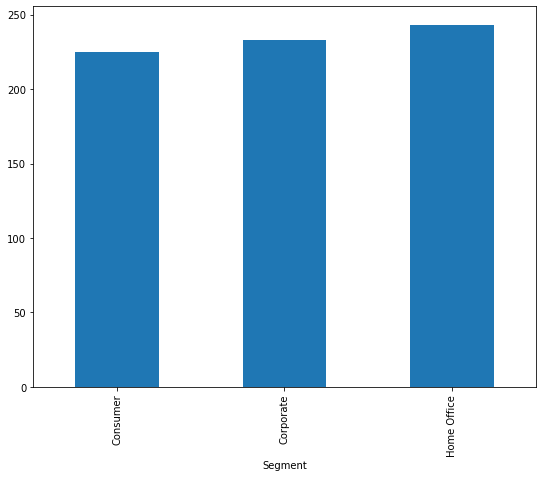

In [70]:
df_segment['Sales'].plot(kind='bar', figsize=(9,7))

In [100]:
df[['City','State','Region']]

,City,State,Region
0,Henderson,Kentucky,South
1,Henderson,Kentucky,South
2,Los Angeles,California,West
3,Fort Lauderdale,Florida,South
4,Fort Lauderdale,Florida,South
...,...,...,...
9795,Chicago,Illinois,Central
9796,Toledo,Ohio,East
9797,Toledo,Ohio,East
9798,Toledo,Ohio,East


In [76]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [81]:
#there is only one country so we can drop it
df.drop('Country', axis=1, inplace=True)

In [89]:
#sales city and state wise
df_state_sales = df.groupby(['State']).mean()

In [90]:
df_state_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       49 non-null     float64
 1   Postal Code  48 non-null     float64
 2   Sales        49 non-null     float64
 3   order_year   49 non-null     float64
dtypes: float64(4)
memory usage: 1.9+ KB


<AxesSubplot:ylabel='State'>

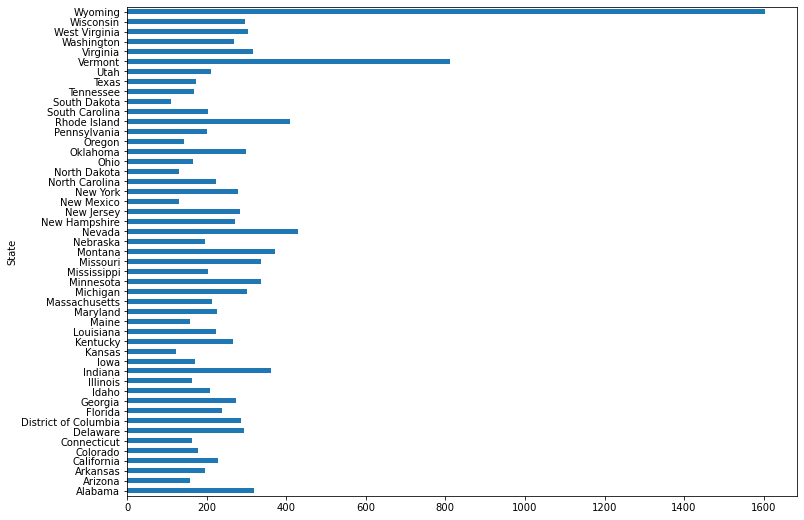

In [92]:
df_state_sales['Sales'].plot(kind='barh', figsize=(12,9))

In [101]:
df[['Product ID','Category','Sub-Category']]

,Product ID,Category,Sub-Category
0,FUR-BO-10001798,Furniture,Bookcases
1,FUR-CH-10000454,Furniture,Chairs
2,OFF-LA-10000240,Office Supplies,Labels
3,FUR-TA-10000577,Furniture,Tables
4,OFF-ST-10000760,Office Supplies,Storage
...,...,...,...
9795,OFF-BI-10003429,Office Supplies,Binders
9796,OFF-AR-10001374,Office Supplies,Art
9797,TEC-PH-10004977,Technology,Phones
9798,TEC-PH-10000912,Technology,Phones


In [103]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [104]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [107]:
#grouping by category and sub category
df_product_category = df.groupby(['Category','Sub-Category']).mean()

In [109]:
df_product_category['Sales']

Category         Sub-Category
Furniture        Bookcases        503.598224
                 Chairs           531.833165
                 Furnishings       95.823865
                 Tables           645.893720
Office Supplies  Appliances       227.926804
                 Art               34.019631
                 Binders          134.067550
                 Envelopes         65.032444
                 Fasteners         14.027850
                 Labels            34.587468
                 Paper             57.420257
                 Storage          263.633885
                 Supplies         252.284283
Technology       Accessories      217.178175
                 Copiers         2215.880212
                 Machines        1645.553313
                 Phones           374.180877
Name: Sales, dtype: float64

<AxesSubplot:ylabel='Category,Sub-Category'>

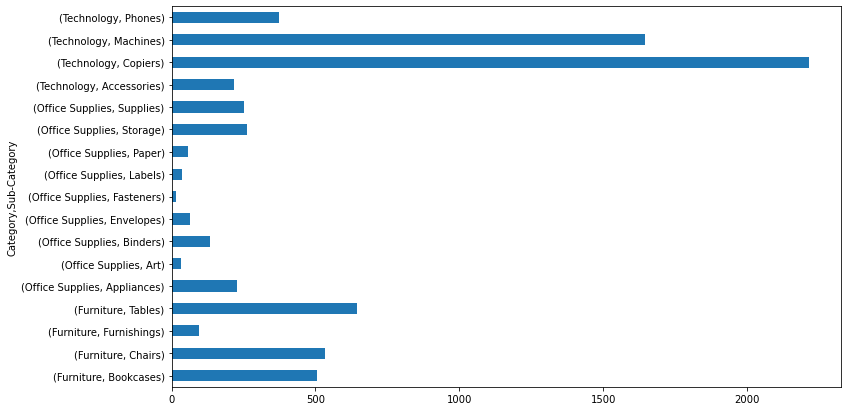

In [110]:
df_product_category['Sales'].plot(kind='barh', figsize=(12,7))